```bash
docker container run --publish 80:80 -d --name webhost nginx
docker container run --publish 80:80 -d --name webproxy httpd
docker container run --publish 3306:3306 -d --name webdb --env="MYSQL_ROOT_PASSWORD=kadencho" mysql
```

```bash

docker container logs webdb

get 

GENERATED ROOT PASSWORD: ye2phu3SoLieNgah5Ohrie1icheeShoe
```

```bash

docker  container top webdb

docker container inspect webdb


docker container stats
```

# Getting a Shell inside container

```bash

docker container run -it --name proxy nginx bash

exit

docker container ls -a

```

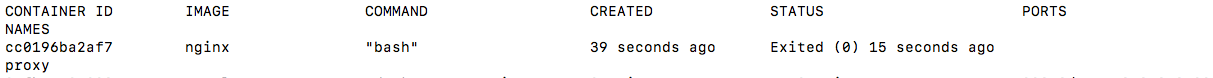

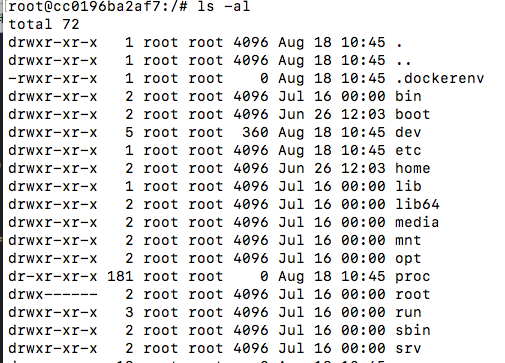

```bash

docker container run -it --name ubuntu ubuntu

apt-get update

apt-get install curl


exit
```


```bash

docker container start -ai ubuntu


exit

docker container exec -it webdb bash


exit

docker container ls
```

exec does not affect the daemon process 

- Alpine linux

```bash

docker pull alpine


docker container run -it alpine bash

docker container run -it alpine sh

apk
```

# Docker Networks : Concepts

```bash

docker container port webhost


docker container inspect --format '{{ .NetworkSettings.IPAddress }}' webhost



ifconfig en0
```

# CLI management of virtual networks

```bash

docker network ls

docker network inspect bridge



[
    {
        "Name": "bridge",
        "Id": "b6b58ff246be13f4029d83f1b93eab80c2a60952954971f8ceb11f0ce7d025f5",
        "Created": "2018-08-18T00:34:15.196109473Z",
        "Scope": "local",
        "Driver": "bridge",
        "EnableIPv6": false,
        "IPAM": {
            "Driver": "default",
            "Options": null,
            "Config": [
                {
                    "Subnet": "172.17.0.0/16",
                    "Gateway": "172.17.0.1"
                }
            ]
        },
        "Internal": false,
        "Attachable": false,
        "Ingress": false,
        "ConfigFrom": {
            "Network": ""
        },
        "ConfigOnly": false,
        "Containers": {
            "5b16877082697664f498942401db3ec0a7805733cf98bf439ec48c14f75d2a24": {
                "Name": "webproxy",
                "EndpointID": "bf619bf4d729b7d50ee4077871b84a76ec9343206d7581eddbbba948f5e74d99",
                "MacAddress": "02:42:ac:11:00:03",
                "IPv4Address": "172.17.0.3/16",
                "IPv6Address": ""
            },
            "9efb77a912206b958434c332b038469e3f4715c12e2a7aea5a0caab8be8e9991": {
                "Name": "webdb",
                "EndpointID": "7b1781a143cb1a5b3605131e0f35e2dc1efdad97722d1b096c2ddaa9820c193f",
                "MacAddress": "02:42:ac:11:00:04",
                "IPv4Address": "172.17.0.4/16",
                "IPv6Address": ""
            },
            "fe83688f5627364a06ee705f479af65ec4d252b5ef09bf0c2fe934749f9da447": {
                "Name": "webhost",
                "EndpointID": "1c86e02ad725e91911de0c96912e7d34124455878958cae9394dbba03267ccc6",
                "MacAddress": "02:42:ac:11:00:02",
                "IPv4Address": "172.17.0.2/16",
                "IPv6Address": ""
            }
        },
        "Options": {
            "com.docker.network.bridge.default_bridge": "true",
            "com.docker.network.bridge.enable_icc": "true",
            "com.docker.network.bridge.enable_ip_masquerade": "true",
            "com.docker.network.bridge.host_binding_ipv4": "0.0.0.0",
            "com.docker.network.bridge.name": "docker0",
            "com.docker.network.driver.mtu": "1500"
        },
        "Labels": {}
    }
]


docker network create --driver

docker network create my_app_net

docker container run -d --name new_nginx --network my_app_net nginx



docker network inspect my_app_net

docker network connect new_network_id target_container_id

docker network connect c7ae1b fe83

docker container inspect webhost
[
    {
        "Id": "fe83688f5627364a06ee705f479af65ec4d252b5ef09bf0c2fe934749f9da447",
        "Created": "2018-08-18T10:20:40.4225557Z",
        "Path": "nginx",
        "Args": [
            "-g",
            "daemon off;"
        ],
        "State": {
            "Status": "running",
            "Running": true,
            "Paused": false,
            "Restarting": false,
            "OOMKilled": false,
            "Dead": false,
            "Pid": 3420,
            "ExitCode": 0,
            "Error": "",
            "StartedAt": "2018-08-18T10:20:41.0274337Z",
            "FinishedAt": "0001-01-01T00:00:00Z"
        },
        "Image": "sha256:c82521676580c4850bb8f0d72e47390a50d60c8ffe44d623ce57be521bca9869",
        "ResolvConfPath": "/var/lib/docker/containers/fe83688f5627364a06ee705f479af65ec4d252b5ef09bf0c2fe934749f9da447/resolv.conf",
        "HostnamePath": "/var/lib/docker/containers/fe83688f5627364a06ee705f479af65ec4d252b5ef09bf0c2fe934749f9da447/hostname",
        "HostsPath": "/var/lib/docker/containers/fe83688f5627364a06ee705f479af65ec4d252b5ef09bf0c2fe934749f9da447/hosts",
        "LogPath": "/var/lib/docker/containers/fe83688f5627364a06ee705f479af65ec4d252b5ef09bf0c2fe934749f9da447/fe83688f5627364a06ee705f479af65ec4d252b5ef09bf0c2fe934749f9da447-json.log",
        "Name": "/webhost",
        "RestartCount": 0,
        "Driver": "overlay2",
        "Platform": "linux",
        "MountLabel": "",
        "ProcessLabel": "",
        "AppArmorProfile": "",
        "ExecIDs": null,
        "HostConfig": {
            "Binds": null,
            "ContainerIDFile": "",
            "LogConfig": {
                "Type": "json-file",
                "Config": {}
            },
            "NetworkMode": "default",
            "PortBindings": {
                "80/tcp": [
                    {
                        "HostIp": "",
                        "HostPort": "8080"
                    }
                ]
            },
            "RestartPolicy": {
                "Name": "no",
                "MaximumRetryCount": 0
            },
            "AutoRemove": false,
            "VolumeDriver": "",
            "VolumesFrom": null,
            "CapAdd": null,
            "CapDrop": null,
            "Dns": [],
            "DnsOptions": [],
            "DnsSearch": [],
            "ExtraHosts": null,
            "GroupAdd": null,
            "IpcMode": "shareable",
            "Cgroup": "",
            "Links": null,
            "OomScoreAdj": 0,
            "PidMode": "",
            "Privileged": false,
            "PublishAllPorts": false,
            "ReadonlyRootfs": false,
            "SecurityOpt": null,
            "UTSMode": "",
            "UsernsMode": "",
            "ShmSize": 67108864,
            "Runtime": "runc",
            "ConsoleSize": [
                0,
                0
            ],
            "Isolation": "",
            "CpuShares": 0,
            "Memory": 0,
            "NanoCpus": 0,
            "CgroupParent": "",
            "BlkioWeight": 0,
            "BlkioWeightDevice": [],
            "BlkioDeviceReadBps": null,
            "BlkioDeviceWriteBps": null,
            "BlkioDeviceReadIOps": null,
            "BlkioDeviceWriteIOps": null,
            "CpuPeriod": 0,
            "CpuQuota": 0,
            "CpuRealtimePeriod": 0,
            "CpuRealtimeRuntime": 0,
            "CpusetCpus": "",
            "CpusetMems": "",
            "Devices": [],
            "DeviceCgroupRules": null,
            "DiskQuota": 0,
            "KernelMemory": 0,
            "MemoryReservation": 0,
            "MemorySwap": 0,
            "MemorySwappiness": null,
            "OomKillDisable": false,
            "PidsLimit": 0,
            "Ulimits": null,
            "CpuCount": 0,
            "CpuPercent": 0,
            "IOMaximumIOps": 0,
            "IOMaximumBandwidth": 0,
            "MaskedPaths": [
                "/proc/acpi",
                "/proc/kcore",
                "/proc/keys",
                "/proc/latency_stats",
                "/proc/timer_list",
                "/proc/timer_stats",
                "/proc/sched_debug",
                "/proc/scsi",
                "/sys/firmware"
            ],
            "ReadonlyPaths": [
                "/proc/asound",
                "/proc/bus",
                "/proc/fs",
                "/proc/irq",
                "/proc/sys",
                "/proc/sysrq-trigger"
            ]
        },
        "GraphDriver": {
            "Data": {
                "LowerDir": "/var/lib/docker/overlay2/6b95c19da98e9744ee282c7647ef1cfe45fa28ae4ea7c0d4ce2a229d9b7757fa-init/diff:/var/lib/docker/overlay2/cbe0badc60fb6dbd86d3bb025200bf70d395651db6f12a4530b12a368dcdadcb/diff:/var/lib/docker/overlay2/ea0bccd1207de32d3e5f973a3f0a0bef25a2c7897fb6e41689c2e6672db8b12c/diff:/var/lib/docker/overlay2/78915c0c852eec07f8cfd9e1b216f6d1089c2d02185a165da3524d409ef5a6a3/diff",
                "MergedDir": "/var/lib/docker/overlay2/6b95c19da98e9744ee282c7647ef1cfe45fa28ae4ea7c0d4ce2a229d9b7757fa/merged",
                "UpperDir": "/var/lib/docker/overlay2/6b95c19da98e9744ee282c7647ef1cfe45fa28ae4ea7c0d4ce2a229d9b7757fa/diff",
                "WorkDir": "/var/lib/docker/overlay2/6b95c19da98e9744ee282c7647ef1cfe45fa28ae4ea7c0d4ce2a229d9b7757fa/work"
            },
            "Name": "overlay2"
        },
        "Mounts": [],
        "Config": {
            "Hostname": "fe83688f5627",
            "Domainname": "",
            "User": "",
            "AttachStdin": false,
            "AttachStdout": false,
            "AttachStderr": false,
            "ExposedPorts": {
                "80/tcp": {}
            },
            "Tty": false,
            "OpenStdin": false,
            "StdinOnce": false,
            "Env": [
                "PATH=/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin",
                "NGINX_VERSION=1.15.2-1~stretch",
                "NJS_VERSION=1.15.2.0.2.2-1~stretch"
            ],
            "Cmd": [
                "nginx",
                "-g",
                "daemon off;"
            ],
            "ArgsEscaped": true,
            "Image": "nginx",
            "Volumes": null,
            "WorkingDir": "",
            "Entrypoint": null,
            "OnBuild": null,
            "Labels": {
                "maintainer": "NGINX Docker Maintainers <docker-maint@nginx.com>"
            },
            "StopSignal": "SIGTERM"
        },
        "NetworkSettings": {
            "Bridge": "",
            "SandboxID": "e2e4f1d43a3d935ca89598d440aa933123c9ef41a42d643e8d652f43bba156a2",
            "HairpinMode": false,
            "LinkLocalIPv6Address": "",
            "LinkLocalIPv6PrefixLen": 0,
            "Ports": {
                "80/tcp": [
                    {
                        "HostIp": "0.0.0.0",
                        "HostPort": "8080"
                    }
                ]
            },
            "SandboxKey": "/var/run/docker/netns/e2e4f1d43a3d",
            "SecondaryIPAddresses": null,
            "SecondaryIPv6Addresses": null,
            "EndpointID": "1c86e02ad725e91911de0c96912e7d34124455878958cae9394dbba03267ccc6",
            "Gateway": "172.17.0.1",
            "GlobalIPv6Address": "",
            "GlobalIPv6PrefixLen": 0,
            "IPAddress": "172.17.0.2",
            "IPPrefixLen": 16,
            "IPv6Gateway": "",
            "MacAddress": "02:42:ac:11:00:02",
            "Networks": {
                "bridge": {
                    "IPAMConfig": null,
                    "Links": null,
                    "Aliases": null,
                    "NetworkID": "b6b58ff246be13f4029d83f1b93eab80c2a60952954971f8ceb11f0ce7d025f5",
                    "EndpointID": "1c86e02ad725e91911de0c96912e7d34124455878958cae9394dbba03267ccc6",
                    "Gateway": "172.17.0.1",
                    "IPAddress": "172.17.0.2",
                    "IPPrefixLen": 16,
                    "IPv6Gateway": "",
                    "GlobalIPv6Address": "",
                    "GlobalIPv6PrefixLen": 0,
                    "MacAddress": "02:42:ac:11:00:02",
                    "DriverOpts": null
                },
                "my_app_net": {
                    "IPAMConfig": {},
                    "Links": null,
                    "Aliases": [
                        "fe83688f5627"
                    ],
                    "NetworkID": "c7ae1b4df658750171c0942cbfa17d4ca43e16d57457b17d60a4d40b236b5593",
                    "EndpointID": "54b01ff806b9b34ff52abb6fa1430c2820e7c2fd23bd4968b326467124740a74",
                    "Gateway": "172.18.0.1",
                    "IPAddress": "172.18.0.3",
                    "IPPrefixLen": 16,
                    "IPv6Gateway": "",
                    "GlobalIPv6Address": "",
                    "GlobalIPv6PrefixLen": 0,
                    "MacAddress": "02:42:ac:12:00:03",
                    "DriverOpts": null
                }
            }
        }
    }
]
docker network disconnect c7ae1b fe83


docker netwrok disconnect




```

- Default Security
  - Create your apps so fronted/backend sit on same docker network
  - Their inter-communication never leaves host
  - All externally exposed ports closed by default
  - You must manually epose via -p, which is better default
  - This gets even better later

# Docker networks : DNS

- Understand how DNS is the key to easy inter container comms

- container belongs to the new bridge has named DNS 

```bash

docker container run -d --name my_nginx --network my_app_net nginx


docker container exec -it my_nginx bash

apt-get update

apt-get install iputils-ping

docker container exec -it my_nginx ping new_nginx

```

# Assignment : CLI App Testing

```
docker container run --name ubuntu --network my_app_net -d ubuntu:14.04

docker container run --rm -it centos:7 bash
docker container run --rm -it ubuntu:14.04 bash
```

# App round robin

```bash

docker network create dude

docker container run -d --net dude --net-alias search elasticsearch:2

docker container run --rm --net dude alpine nslookup search

docker container run --rm --net dude centos curl -s search:9200

```

# What's an image

# docker hub

- official
  - documentation
  
```bash

docker pull nginx

```
- tag on imagep

# Images and their layers
- image layers
- union file system
- history and inspect
- copy on write

```bash

docker history webhost

docker image inspect nginx

```


# Image tagging and push

- organizational based mysql


```bash

docker image tag nginx kadencho/nginx

docker login

cat ~/.docker/config.json


docker image push kadencho/nginx

docker image tag kadencho/nginx kadensungbincho/nginx

docker image rm kadencho/nginx

docker image tage kadensungbincho/nginx kadensungbincho/nginx:testing

docker image push kadensungbincho/nginx:testing 
```

# Building images 

Dockerfile
```bash

docker build -f Dockerfile

```

FROM : usually alpine recently
ENV : environment variables
(order matters, each for layer)

RUN : execute after installation

&& to make it on the same layer 

# Running docker builds

```bash

docker image build -t customdocker .

```

- it keeps build cache so that next time we build this thibgm if that line hasn't changed in the dockerfile, it's not gonna rerun it. Cache the steps.

Make sure the thing changes less at the top, so that cache works.

# Extending official images

- When we use the FROM, we inherit everything except ENV from the Dockerfile we're froming. 

```bash


# this same shows how we can extend/change an existing official image from Docker Hub
  
FROM nginx:latest
# highly recommend you always pin versions for anything beyond dev/learn

WORKDIR /usr/share/nginx/html
# change working directory to root of nginx webhost
# using WORKDIR is prefered to using 'RUN cd /some/path'

COPY index.html index.html

# I don't have to specify EXPOSE or CMD because they're in my FROM

```

# Assignment

```docker
FROM node:6-alpine

RUN apk add --update tini /
    && mkdir -p /usr/src/app 
    
WORKDIR /usr/src/app


COPY package*.json ./

RUN npm install \
    && npm cache clean --force
    
EXPOSE 80 443

COPY . .

CMD ["/sbin/tini", "--", "node", "./bin/www"]
```

```bash

docker container run --rm -p 80:3000 assignment_dockerfile

```


# Container Lifetime & Persistent Data